In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df=pd.read_csv('/content/drive/MyDrive/project/waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [5]:
df.shape

(7999, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [8]:
df.describe(include='all')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999
unique,NaN,2564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7084
mean,0.666158,NaN,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,NaN
std,1.265145,NaN,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,NaN
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.040000,NaN,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,NaN
50%,0.070000,NaN,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,NaN
75%,0.280000,NaN,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,NaN


In [9]:
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')

In [10]:
df['ammonia'] = df['ammonia'].fillna(df['ammonia'].mode()[0])
df['is_safe'] = df['is_safe'].fillna(df['is_safe'].mode()[0])

In [11]:
df.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067633,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,...,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711,0.334017
ammonia,0.067633,1.000000,0.046961,0.070340,-0.006537,0.105184,0.125146,0.016147,-0.027910,0.063798,...,-0.037554,0.006602,-0.063592,0.020305,0.091322,0.050061,0.029805,0.075843,0.014582,-0.022693
arsenic,0.225773,0.046961,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,...,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455,-0.123311
barium,0.294145,0.070340,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,...,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440,0.090912
cadmium,-0.099911,-0.006537,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,...,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633,-0.256006
chloramine,0.369309,0.105184,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,...,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658,0.186784
chromium,0.353218,0.125146,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,...,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526,0.182381
copper,0.168612,0.016147,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,...,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978,0.029540
flouride,-0.009784,-0.027910,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,...,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792,0.006616
bacteria,-0.078238,0.063798,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,...,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839,-0.022021


<Axes: >

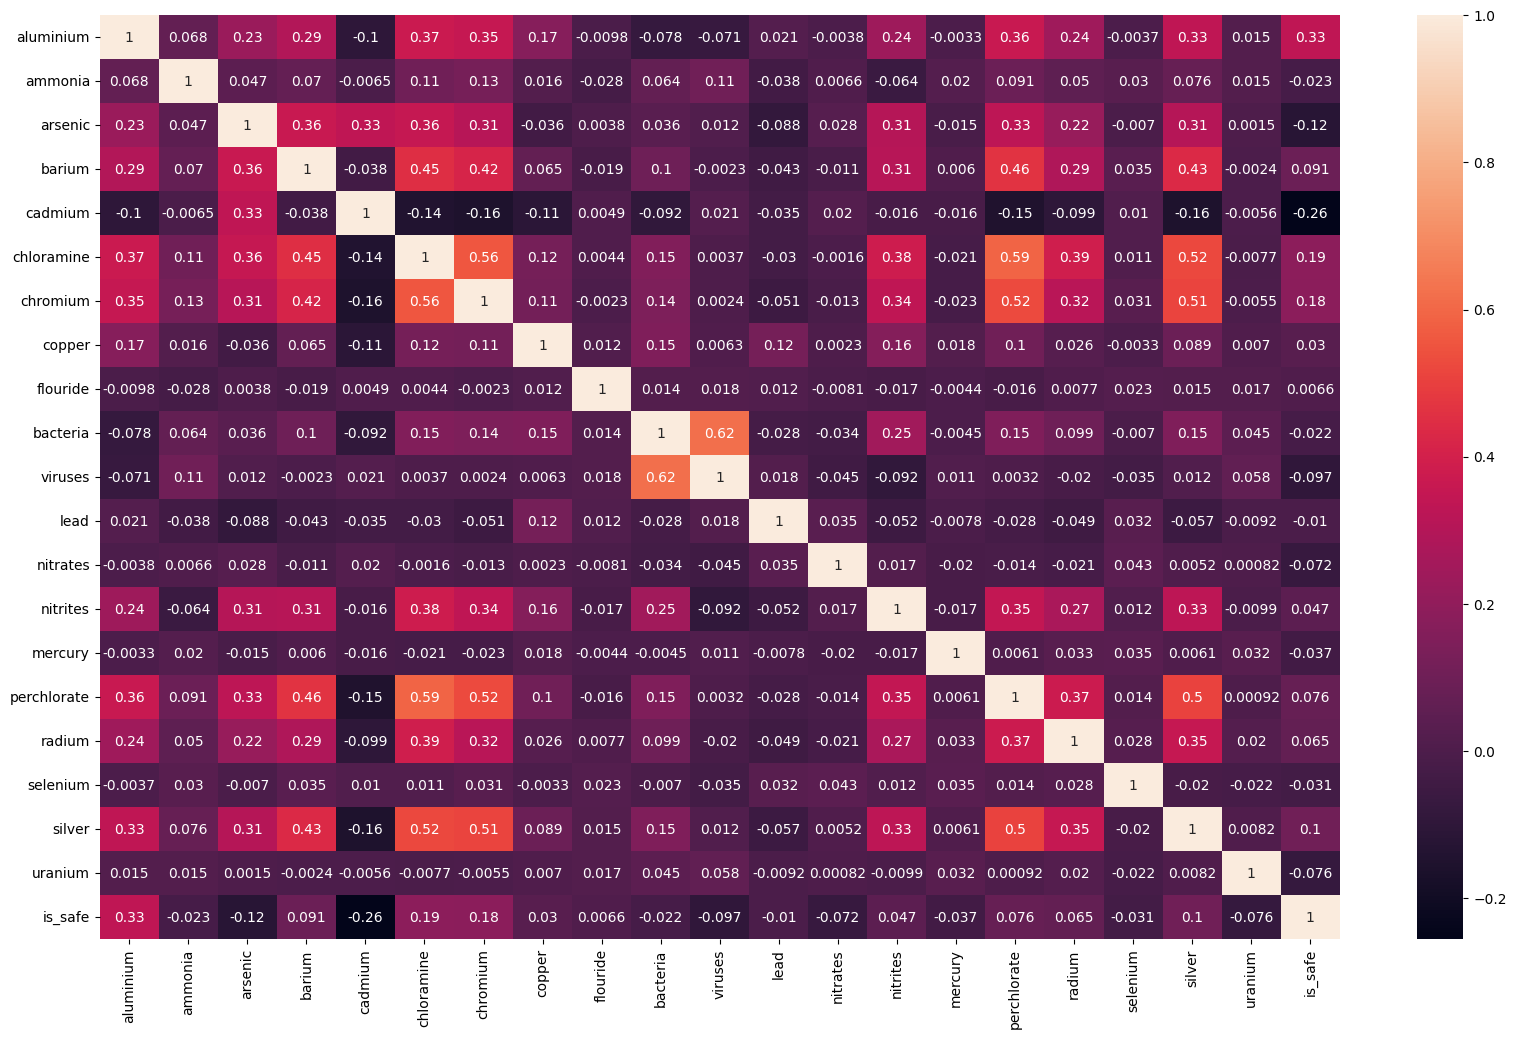

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True)

In [13]:
X=df.iloc[:,:-1]
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [14]:
df.shape

(7999, 21)

In [15]:
y=df.iloc[:,-1]
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
7994    1.0
7995    1.0
7996    1.0
7997    1.0
7998    1.0
Name: is_safe, Length: 7999, dtype: float64

In [16]:
df['is_safe'].value_counts()


0.0    7087
1.0     912
Name: is_safe, dtype: int64

<Axes: xlabel='is_safe', ylabel='count'>

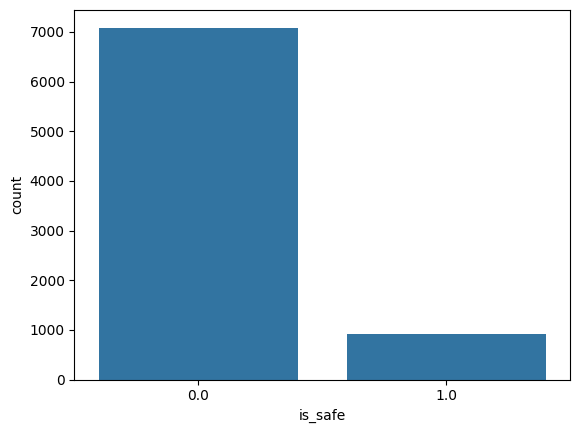

In [17]:
sns.countplot(x='is_safe',data=df)

In [18]:
os=SMOTE()
X_os,y_os=os.fit_resample(X,y)
y_os.value_counts()


1.0    7087
0.0    7087
Name: is_safe, dtype: int64

In [19]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_os)
X_scaled

array([[0.32673267, 0.30614973, 0.03809524, ..., 0.8       , 0.68      ,
        0.22222222],
       [0.45940594, 0.70989305, 0.00952381, ..., 0.8       , 0.54      ,
        0.55555556],
       [0.2       , 0.47125668, 0.03809524, ..., 0.7       , 0.88      ,
        0.11111111],
       ...,
       [0.18854513, 0.80147059, 0.69028311, ..., 0.7       , 0.18      ,
        0.11111111],
       [0.00764369, 0.82853857, 0.07812219, ..., 0.25314466, 0.07874213,
        0.64413   ],
       [0.01161628, 0.80903969, 0.05714286, ..., 0.4       , 0.0356689 ,
        0.88888889]])

In [20]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

*************** DecisionTreeClassifier(criterion='entropy') ***************
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      2088
         1.0       0.95      0.96      0.96      2165

    accuracy                           0.96      4253
   macro avg       0.96      0.96      0.96      4253
weighted avg       0.96      0.96      0.96      4253

*************** KNeighborsClassifier() ***************
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.83      2088
         1.0       0.78      0.98      0.87      2165

    accuracy                           0.85      4253
   macro avg       0.88      0.85      0.85      4253
weighted avg       0.88      0.85      0.85      4253

*************** SVC() ***************
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      2088
         1.0       0.79      0.80      0.80      2165

    accuracy 

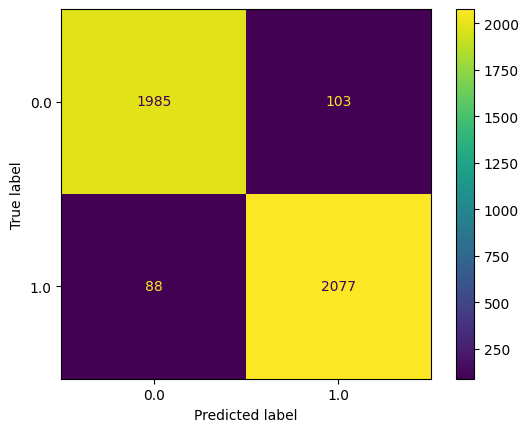

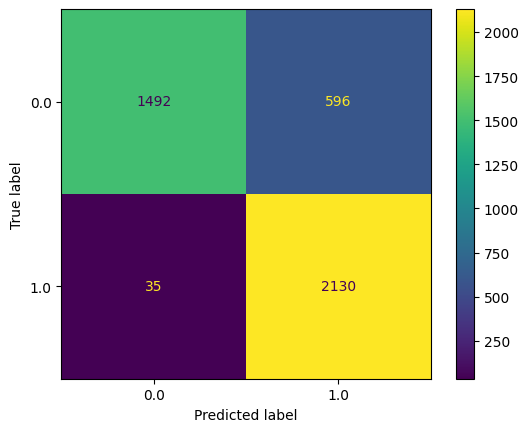

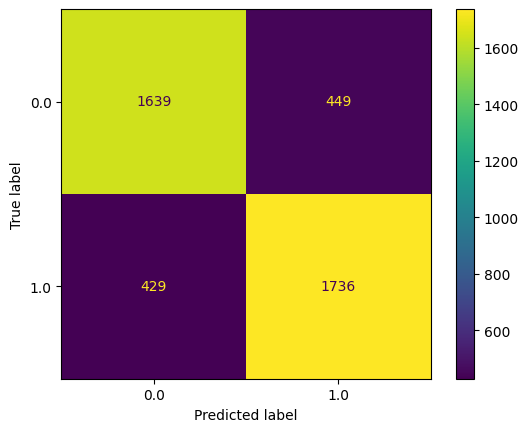

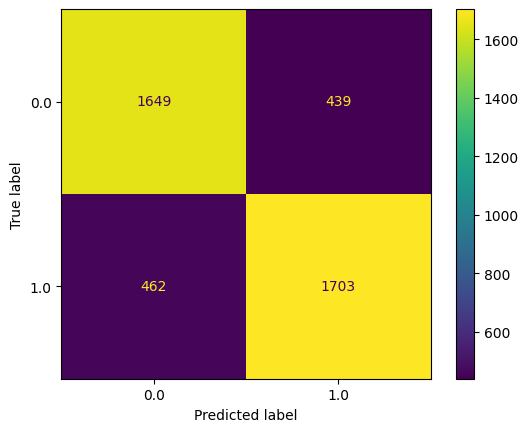

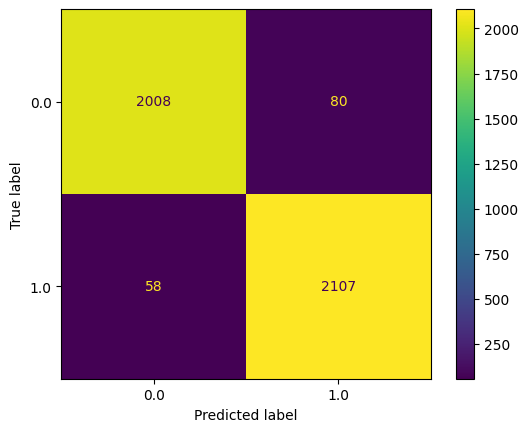

In [21]:
dec=DecisionTreeClassifier(criterion="entropy")
knn=KNeighborsClassifier()
nb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier()
models=[dec,knn,sv,nb,rf]
for model in models:
  print("***************",model,"***************")
  model.fit(X_os_train,y_os_train)
  y_pred=model.predict(X_os_test)
  print(classification_report(y_os_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_pred))

In [22]:
y_new=dec.predict(scaler.transform([[1.65,	9.08,	0.04,	2.85,	0.007,	0.35,	0.83,	0.17,	0.05,	0.20,	0.000,	0.054,	16.08,	1.13,	0.007,	37.75,	6.78,	0.08,	0.34,	0.02]]))
y_new

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [23]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy')
dec.fit(X_os_train,y_os_train)

DecisionTreeClassifier(criterion='entropy')

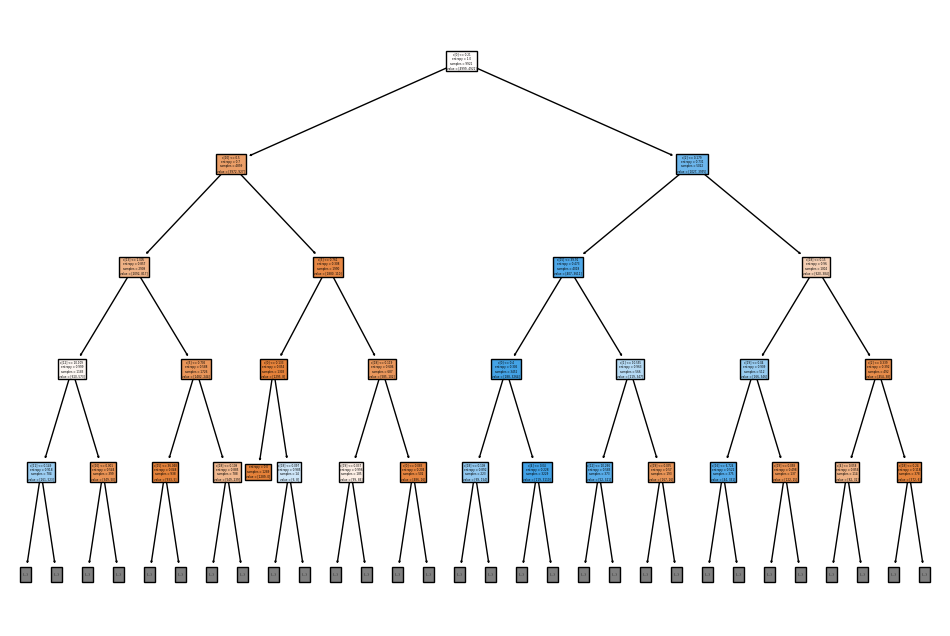

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(dec,max_depth=4,filled=True)
plt.show()

In [25]:
df1=pd.DataFrame({'Actual_value':y_os_test,'Predicted_value':y_pred})
df1

,Actual_value,Predicted_value
12784,1.0,1.0
4140,0.0,0.0
847,1.0,1.0
9797,1.0,1.0
6878,0.0,0.0
...,...,...
12302,1.0,1.0
1185,0.0,0.0
6194,0.0,0.0
12132,1.0,1.0


In [26]:
import pickle
pickle.dump(dec,open("model_saved",'wb'))

In [27]:
model_loaded=pickle.load(open('/content/model_saved','rb'))

In [28]:
accuracy=classification_report(y_os_test,y_pred)
model_loaded.predict(X_os_test)
print("Test accuracy:",accuracy)

Test accuracy:               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      2088
         1.0       0.96      0.97      0.97      2165

    accuracy                           0.97      4253
   macro avg       0.97      0.97      0.97      4253
weighted avg       0.97      0.97      0.97      4253



In [29]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [30]:
%%writefile app.py

Writing app.py


In [31]:
! wget -q -o -

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
